# I.1 Gauss Function

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
import scipy as sp
from scipy.stats import norm

data = np.linspace(-5,4,100)
def gaussian(x):
    sigma = 2
    mu = -1
    a = (2*3.14*(sigma**2))**(1/2)
    b = ((x-mu)**2)/(2*sigma**2)
    value = (1/a)*(e**(-b))
    return value

answer = gaussian(data)

# I.2 Scipy.stats

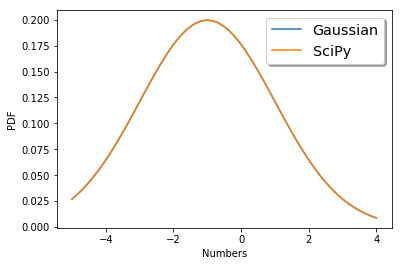

In [3]:
answer2 = norm.pdf(data,-1,2)

fig,ax = plt.subplots()
ax.plot(data,answer,label='Gaussian')
ax.plot(data,answer2,label='SciPy')
ax.set(xlabel='Numbers',ylabel='PDF');
ax.legend(loc='upper right', shadow=True, fontsize='x-large');

# I.3 Statistical measures

In [4]:
mean = sp.mean(data)
print('Mean =',mean)
median = sp.median(data)
print('Median =',median)
variance = sp.var(data)
print('Variance =',variance)
standard_deviation = sp.std(data)
print('Standard deviation =',standard_deviation)

Mean = -0.5
Median = -0.49999999999999956
Variance = 6.886363636363637
Standard deviation = 2.624188186156556


# II.1 Discrete Distribution

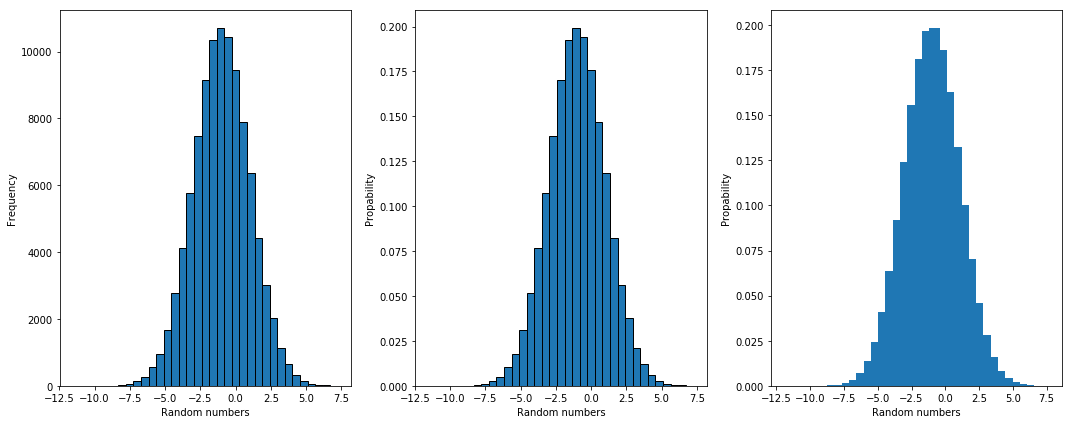

In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

RN = np.random.normal(-1,2,size=100000)
bins  = 35

fig,ax = plt.subplots(ncols=3,figsize=(15,6))

#histogram for frequency
output = ax[0].hist(RN,bins=bins,edgecolor="black");
ax[0].set(xlabel='Random numbers',ylabel='Frequency')

#Histogram for Propability density
ax[1].hist(RN,bins=bins,edgecolor="black",density=True);
ax[1].set(xlabel='Random numbers',ylabel='Propability')

#Bar chart for Gaussian
G=gaussian(output[1])
ax[2].bar(output[1],G)
ax[2].set(xlabel='Random numbers',ylabel='Propability')


fig.tight_layout()

# III.Convergence Study

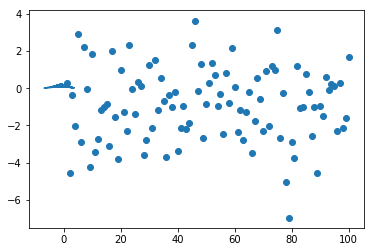

In [12]:
RN=np.random.normal(-1,2,size=100)
x_axis = np.arange(1,101,1)
bins=35
n,x = np.histogram(RN,bins=bins)
G=norm.pdf(RN,-1,2)
plt.scatter(x_axis,RN);




[0.00111111 0.00333333 0.01777778 0.04555556 0.08888889 0.15222222
 0.17       0.20222222 0.15777778 0.09111111 0.05222222 0.01444444
 0.00222222 0.00111111]


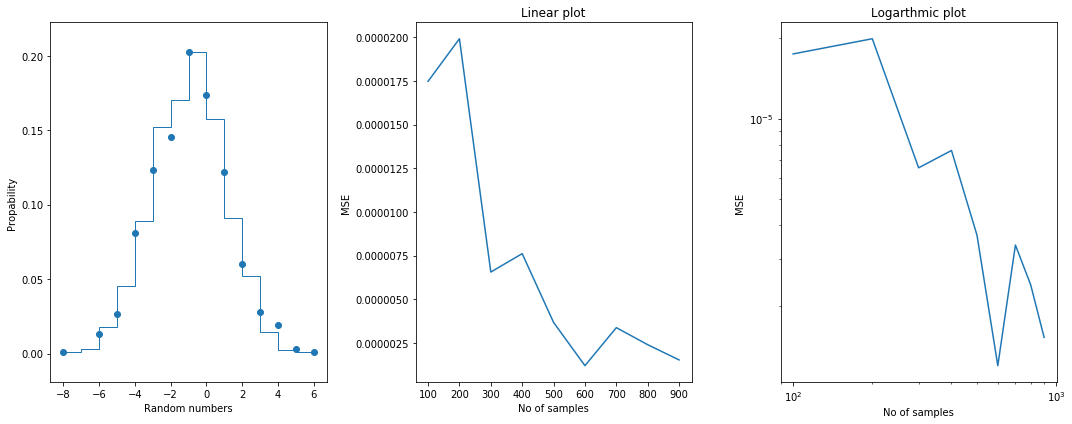

In [7]:
sample=np.arange(100,1000,100)
Mean_sq=[]
for i in sample:
    CD = np.random.normal(-1,2,size=i)
   
    
    DR = np.round(np.random.normal(-1,2,size=i))
    c = sp.stats.itemfreq(DR)
    val1 = c[:,0]
    Frequency1 = c[:,1]
    Propability1 = Frequency1/Frequency1.sum()
    GS = gaussian(val1)

    Diff = Propability1 - GS
    Sum=np.sum(np.square(Diff))
    MSE = Sum/i
    Mean_sq.append(MSE)


fig,ax = plt.subplots(ncols=3,figsize=(15,6))
ax[0].scatter(val1,Propability1);
n,x,_= ax[0].hist(CD,bins=np.arange(-8,7,1),histtype = u'step',density=True);
ax[0].set(xlabel='Random numbers',ylabel='Propability')
ax[1].plot(sample,Mean_sq)
ax[1].set(xlabel='No of samples',ylabel='MSE',title='Linear plot')
ax[2].loglog(sample,Mean_sq)
ax[2].set(xlabel='No of samples',ylabel='MSE',title='Logarthmic plot')
print(n)
fig.tight_layout()


A straight line in the loglog plot represents a good convergence behaviour, because a definite power relationship exists between the No of samples and the mean square error. 